In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# !pip install pandas seaborn matplotlib

<Axes: >

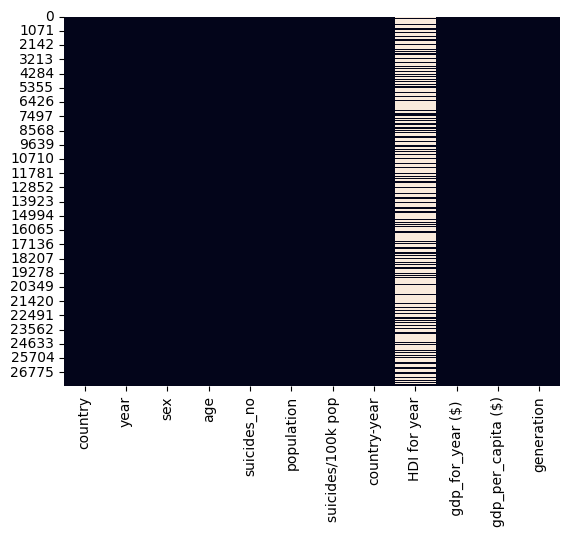

In [18]:

df = pd.read_csv('suicides.csv')

categorical_columns = ['country', 'year', 'sex', 'age', 'generation']
numerical_columns = ['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)']

unique_values = df[categorical_columns].nunique()

sns.heatmap(df.isnull(), cbar=False)

In [19]:

outliers = {}
for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[column] = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])

In [20]:
for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Text(0.5, 1.0, 'Population vs Suicides No')

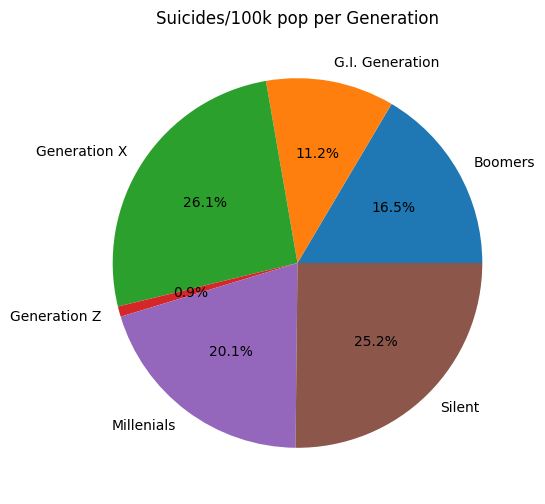

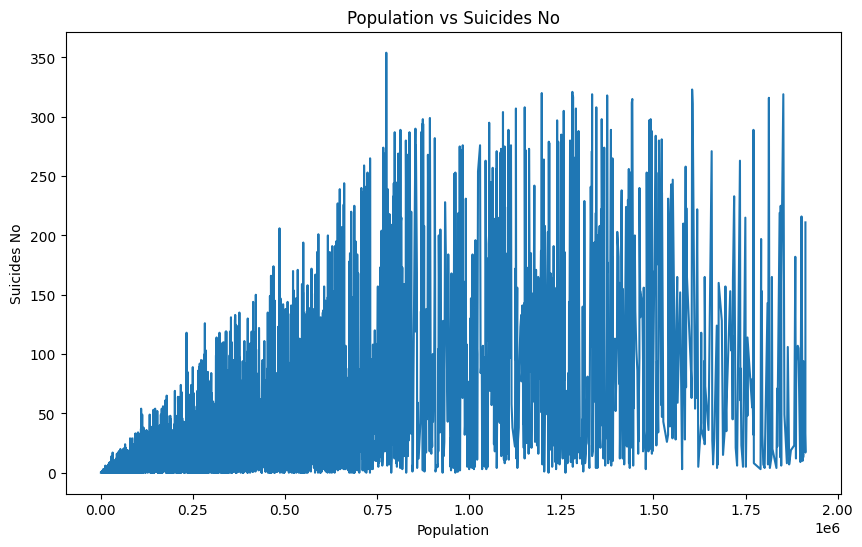

In [21]:
correlation = df[numerical_columns].corr().abs().unstack().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
df.groupby('generation')['suicides/100k pop'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Suicides/100k pop per Generation')
plt.figure(figsize=(10, 6))
df.groupby('population')['suicides_no'].sum().plot(kind='line')
plt.xlabel('Population')
plt.ylabel('Suicides No')
plt.title('Population vs Suicides No')

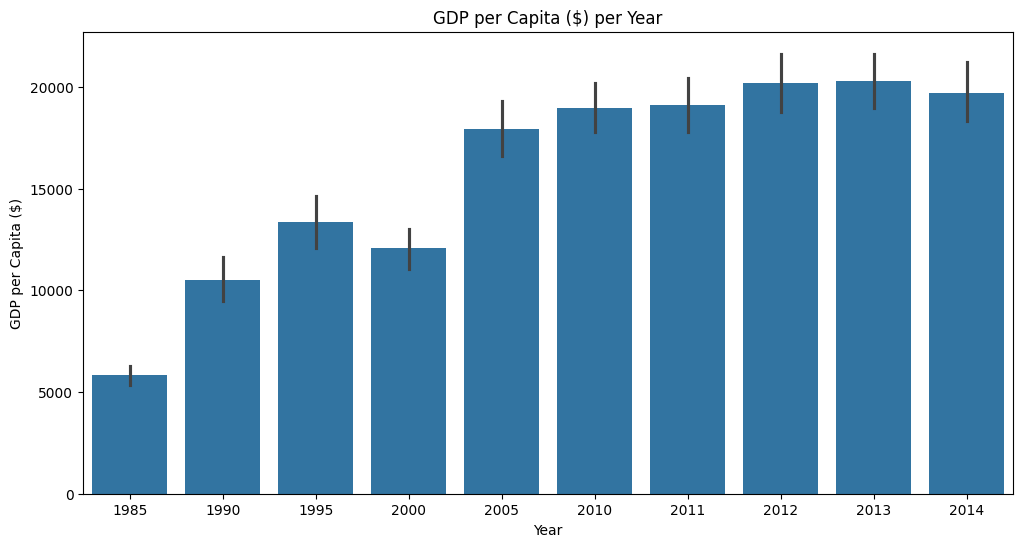

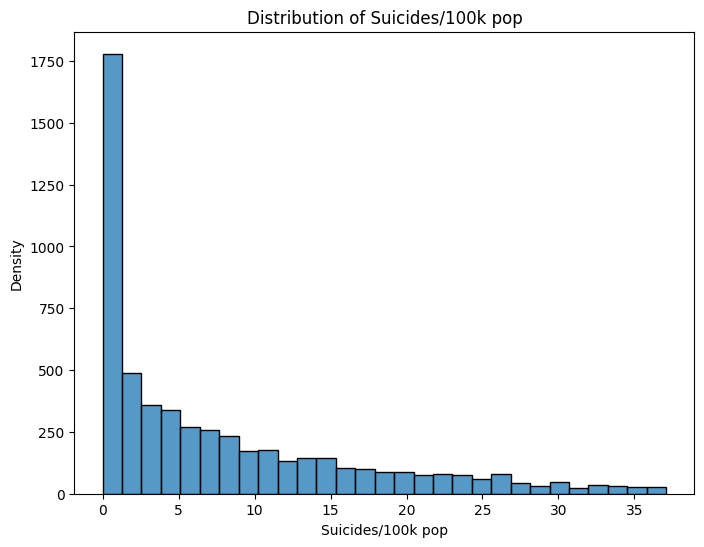

In [22]:

plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='gdp_per_capita ($)', data=df)
plt.xlabel('Year')
plt.ylabel('GDP per Capita ($)')
plt.title('GDP per Capita ($) per Year')

plt.figure(figsize=(8, 6))
sns.histplot(df['suicides/100k pop'])
plt.xlabel('Suicides/100k pop')
plt.ylabel('Density')
plt.title('Distribution of Suicides/100k pop')

plt.show()